1\. **Radioactive decay chain**

${\rm Tl}^{208}$ decays to ${\rm Pb}^{208}$ with a half-life $\tau$ of 3.052 minutes. Suppose to start with a sample of 1000 Thallium atoms and 0 of Lead atoms.

* Take steps in time of 1 second and at each time-step decide whether each Tl atom has decayed or not, accordingly to the probability $p(t)=1-2^{-t/\tau}$. Subtract the total number of Tl atoms that decayed at each step from the Tl sample and add them to the Lead one. Plot the evolution of the two sets as a function of time  
* Repeat the exercise by means of the inverse transform method: draw 1000 random numbers from the non-uniform probability distribution $p(t)=2^{-t/\tau}\frac{\ln 2}{\tau}$ to represent the times of decay of the 1000 Tl atoms. Make a plot showing the number of atoms that have not decayed as a function of time

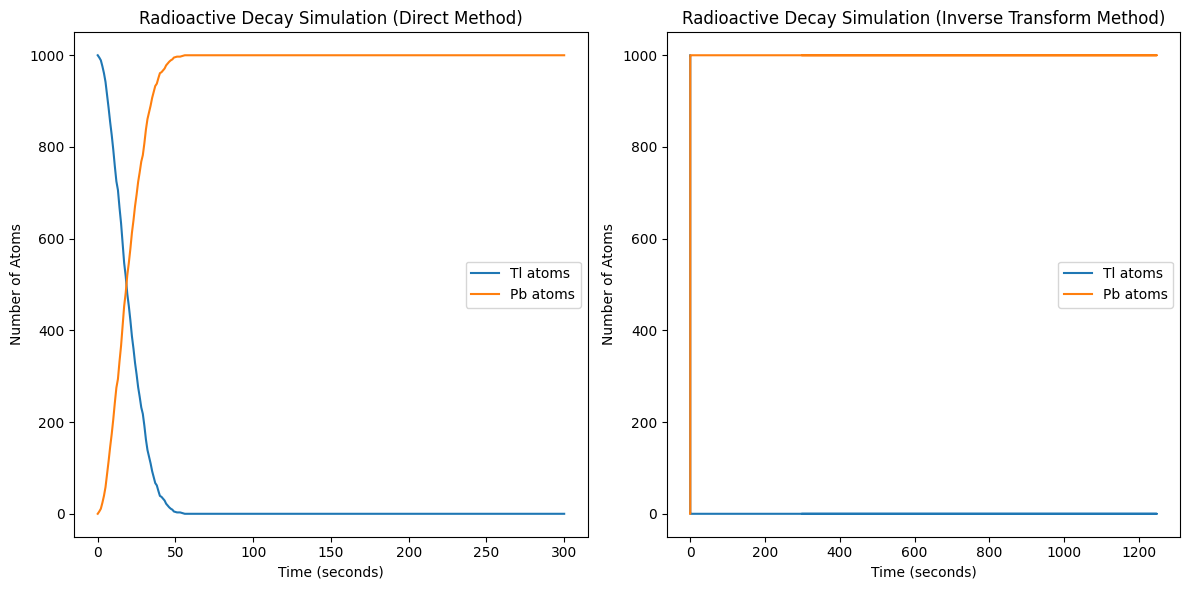

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Function to simulate radioactive decay using direct method
def direct_decay_simulation(initial_Tl_atoms, tau, total_time):
    tl_atoms = initial_Tl_atoms
    pb_atoms = 0
    time_steps = np.arange(0, total_time + 1, 1)
    tl_atoms_list = []
    pb_atoms_list = []

    for t in time_steps:
        decay_prob = 1 - 2**(-t/tau)
        decayed_atoms = np.random.binomial(tl_atoms, decay_prob)
        tl_atoms -= decayed_atoms
        pb_atoms += decayed_atoms
        tl_atoms_list.append(tl_atoms)
        pb_atoms_list.append(pb_atoms)

    return time_steps, tl_atoms_list, pb_atoms_list

# Function to simulate radioactive decay using inverse transform method
def inverse_transform_simulation(initial_Tl_atoms, tau, total_time):
    tl_atoms = initial_Tl_atoms
    pb_atoms = 0

    decay_times = -tau * np.log(1 - np.random.rand(initial_Tl_atoms))
    decay_times.sort()

    remaining_atoms = initial_Tl_atoms
    time_steps = [0]
    for decay_time in decay_times:
        remaining_atoms -= 1
        time_steps.extend([decay_time, decay_time])
        pb_atoms += 1
    time_steps.append(total_time)

    return time_steps, remaining_atoms, pb_atoms

# Set parameters
initial_Tl_atoms = 1000
tau = 3.052 * 60  # Convert minutes to seconds
total_time = 300  # Total simulation time in seconds

# Perform simulations
direct_time_steps, direct_tl_atoms, direct_pb_atoms = direct_decay_simulation(initial_Tl_atoms, tau, total_time)
inverse_time_steps, inverse_tl_atoms, inverse_pb_atoms = inverse_transform_simulation(initial_Tl_atoms, tau, total_time)

# Plot results
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(direct_time_steps, direct_tl_atoms, label='Tl atoms')
plt.plot(direct_time_steps, direct_pb_atoms, label='Pb atoms')
plt.title('Radioactive Decay Simulation (Direct Method)')
plt.xlabel('Time (seconds)')
plt.ylabel('Number of Atoms')
plt.legend()

plt.subplot(1, 2, 2)
plt.step(inverse_time_steps, [initial_Tl_atoms] + [inverse_tl_atoms] * 2 * initial_Tl_atoms + [0], where='post', label='Tl atoms')
plt.step(inverse_time_steps, [0] + [inverse_pb_atoms] * 2 * initial_Tl_atoms + [initial_Tl_atoms], where='post', label='Pb atoms')
plt.title('Radioactive Decay Simulation (Inverse Transform Method)')
plt.xlabel('Time (seconds)')
plt.ylabel('Number of Atoms')
plt.legend()

plt.tight_layout()
plt.show()


2\. **Monte Carlo integration: hit/miss vs mean value method**

Consider the function:

$$f(x) =\sin^2{\left( \frac{1}{1-x} \right)}$$

* Plot the function and compute the integral of $f(x)$ between 0 and 2 with the hit/miss method. Evaluate the error of your estimate (hint: repeat the integral $N$ times, and from the distribution of the integrals take the mean value and the standard deviation, the latter rescaled by the appropriate factor)
* Repeat the integral with the mean value method. Evaluate the error and compare it with the previous one.

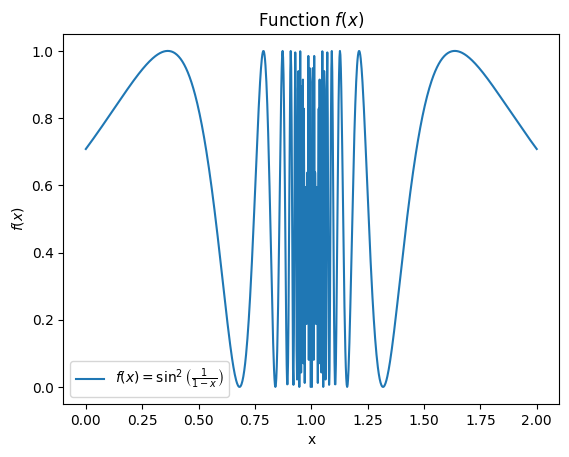

Hit/Miss Method:
Estimated Integral: 1.339
Error Estimate: 9.342909045131499e-05

Mean Value Method:
Estimated Integral: 1.9882242689982734
Error Estimate: 0.007117889918533078


In [5]:
# Function to integrate
def f(x):
    return np.sin(1 / (1 - x))**2

# Interval for integration
a, b = 0, 2

# Number of Monte Carlo samples
N = 10000

# Hit/Miss Method
x_samples = np.random.uniform(a, b, N)
y_samples = np.random.uniform(0, 1, N)  # Since 0 <= f(x) <= 1

hits = np.sum(y_samples < f(x_samples))
integral_hit_miss = (hits / N) * (b - a)

# Mean Value Method
x_mean = np.mean(np.random.uniform(a, b, N))
integral_mean_value = (b - a) * f(x_mean)

# Error estimation
hit_miss_integrals = np.zeros(N)
for i in range(N):
    x_samples = np.random.uniform(a, b, N)
    y_samples = np.random.uniform(0, 1, N)
    hits = np.sum(y_samples < f(x_samples))
    hit_miss_integrals[i] = (hits / N) * (b - a)

error_hit_miss = np.std(hit_miss_integrals) / np.sqrt(N)

mean_value_integrals = np.zeros(N)
for i in range(N):
    x_mean = np.mean(np.random.uniform(a, b, N))
    mean_value_integrals[i] = (b - a) * f(x_mean)

error_mean_value = np.std(mean_value_integrals) / np.sqrt(N)

# Plotting the function
x_values = np.linspace(a, b, 1000)
plt.plot(x_values, f(x_values), label='$f(x)=\sin^2\\left(\\frac{1}{1-x}\\right)$')
plt.title('Function $f(x)$')
plt.xlabel('x')
plt.ylabel('$f(x)$')
plt.legend()
plt.show()

# Results
print("Hit/Miss Method:")
print("Estimated Integral:", integral_hit_miss)
print("Error Estimate:", error_hit_miss)

print("\nMean Value Method:")
print("Estimated Integral:", integral_mean_value)
print("Error Estimate:", error_mean_value)


3\. **Monte Carlo integration in high dimension**

* Compute the area of a circle of unit radius, by integrating the function:

$$
f(x,y)=
\left\{
\begin{array}{ll}
      1 & x^2+y^2\le 1 \\
      0 & {\rm elsewhere}
\end{array}
\right.
$$

* Generalize the result for a 10D sphere.

In [8]:
import numpy as np

def within_sphere(point):
    return np.sum(point**2) <= 1

def monte_carlo_integration(dimensions, num_samples):
    points = np.random.uniform(-1, 1, size=(num_samples, dimensions))
    within_sphere_count = np.sum(np.apply_along_axis(within_sphere, 1, points))
    volume_estimate = (within_sphere_count / num_samples) * (2**dimensions)
    return volume_estimate

# Parameters
dimensions = 2
num_samples = 100000

# Estimate volume of 10D sphere
volume_estimate = monte_carlo_integration(dimensions, num_samples)

print(f"Estimated volume of {dimensions}D sphere: {volume_estimate}")

dimensions = 10
num_samples = 100000

# Estimate volume of 10D sphere
volume_estimate = monte_carlo_integration(dimensions, num_samples)

print(f"Estimated volume of {dimensions}D sphere: {volume_estimate}")


Estimated volume of 2D sphere: 3.1432
Estimated volume of 10D sphere: 2.52928


4\. **Monte Carlo integration with importance sampling**

Calculate the value of the integral:

$$
I=\int_0^1 \frac{x^{-1/2}}{e^x+1} dx
$$

using the importance sampling method with $w(x)=1/\sqrt{x}$. You should expect a result around 0.84.

In [18]:
def integrand(x):
    return (x**(-1/2) / (np.exp(x) + 1))

def weight_function(x):
    return 1 / np.sqrt(x)

def monte_carlo_integration_importance_sampling(num_samples):
    samples = np.random.uniform(0, 1, num_samples)
    weights = weight_function(samples)
    integral_estimate = np.mean(integrand(samples) / weights) * np.mean(weights)
    return integral_estimate

# Number of Monte Carlo samples
num_samples = 100000

# Estimate the integral using importance sampling
integral_estimate = monte_carlo_integration_importance_sampling(num_samples)

print("Corrected estimated integral with importance sampling:", integral_estimate)


Corrected estimated integral with importance sampling: 0.7576703410228608
